In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
data = pd.read_csv('D:\python_github\AB_NYC_2019.csv')
print(data.head())
data.shape

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

(48895, 16)

In [3]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df = data.copy()

In [6]:
df['price'] = (df['price'].astype(str).str.replace('[$,]','').replace('',np.nan))
df['price'] = pd.to_numeric(df['price'], errors='coerce')

C:\Users\Shatakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [8]:
# Basic new features
df['price_per_room'] = df['price'] / df['calculated_host_listings_count'].replace(0, np.nan)
df['log_price'] = np.log1p(df['price'])

# Filterinf for price<=0 and missing records of location
df = df[(df['price'] > 0) & df['latitude'].notna() & df['longitude'].notna()].copy()
print("After basic filter:", df.shape)

After basic filter: (48884, 18)


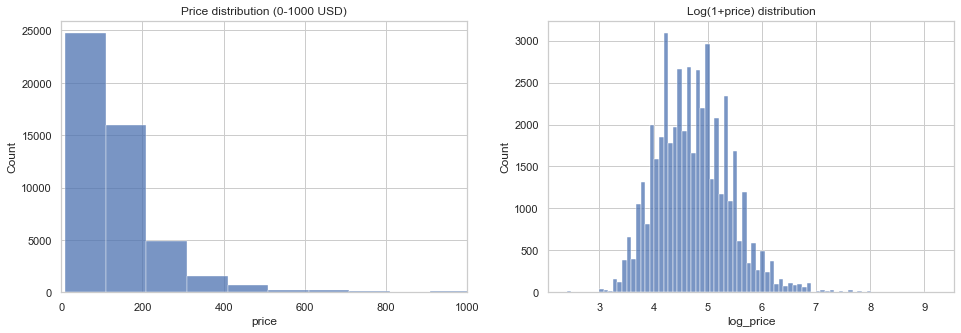

In [9]:
# price and log price dustribution
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.histplot(df['price'], bins=100, ax=axes[0])
axes[0].set_xlim(0, 1000)
axes[0].set_title("Price distribution (0-1000 USD)")

sns.histplot(df['log_price'].dropna(), bins=80, ax=axes[1])
axes[1].set_title("Log(1+price) distribution")
plt.show()

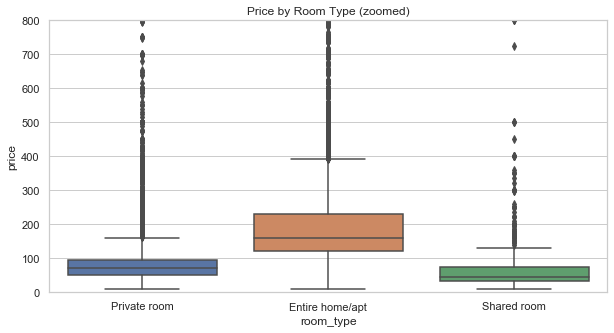

In [10]:
# price according to room type
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='room_type', y='price')
plt.ylim(0, 800)
plt.title("Price by Room Type (zoomed)")
plt.show()

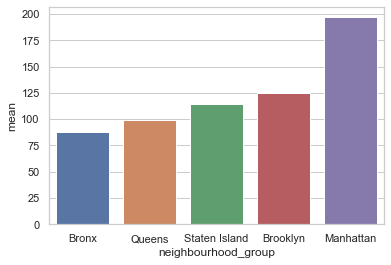

In [11]:
# avg price by neighbourhood_group  

price_details = df.groupby('neighbourhood_group')['price'].agg(['count','median','mean']).sort_values('median')
sns.barplot(x=price_details.index, y=price_details['mean'])
plt.show()

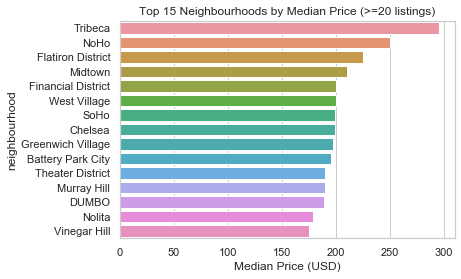

In [12]:
# Top 15 neighbourhoods by median price (filter to neighbourhoods with >= 20 listings)
neigh_stats = df.groupby(['neighbourhood'])['price'].agg(['count','median']).reset_index()
neigh_stats = neigh_stats[neigh_stats['count']>=20].sort_values('median', ascending=False).head(15)

sns.barplot(data=neigh_stats, y='neighbourhood', x='median')
plt.title("Top 15 Neighbourhoods by Median Price (>=20 listings)")
plt.xlabel("Median Price (USD)")
plt.show()

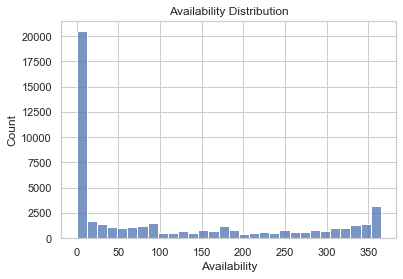

In [13]:
sns.histplot(data=df['availability_365'], bins=30)
plt.xlabel('Availability')
plt.title('Availability Distribution')
plt.show()

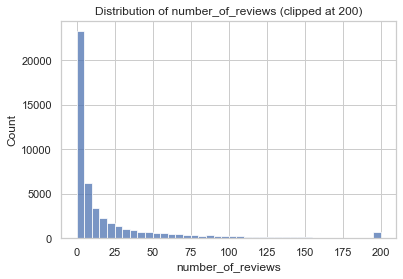

In [14]:
# Reviews distribution
sns.histplot(df['number_of_reviews'].clip(upper=200), bins=40)
plt.title("Distribution of number_of_reviews (clipped at 200)")   # 0 reviews to 200+
plt.show()

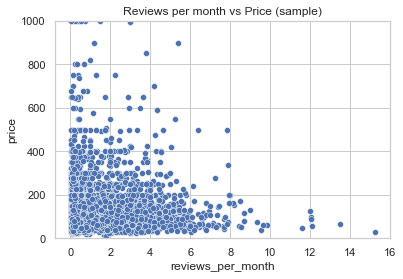

In [15]:
# understanding review and price relationship
sns.scatterplot(x='reviews_per_month', y='price', data=df.sample(5000))
plt.ylim(0, 1000)
plt.title("Reviews per month vs Price (sample)")
plt.show()

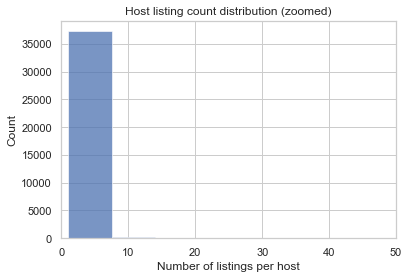

In [16]:
top_hosts = df.groupby(['host_id','host_name']).size().reset_index(name='listings_count').sort_values('listings_count', ascending=False).head(20)
top_hosts

# Distribution of host listing counts
h = df.groupby('host_id').size()
sns.histplot(h, bins=50)
plt.xlim(0,50)
plt.title("Host listing count distribution (zoomed)")
plt.xlabel("Number of listings per host")
plt.show()

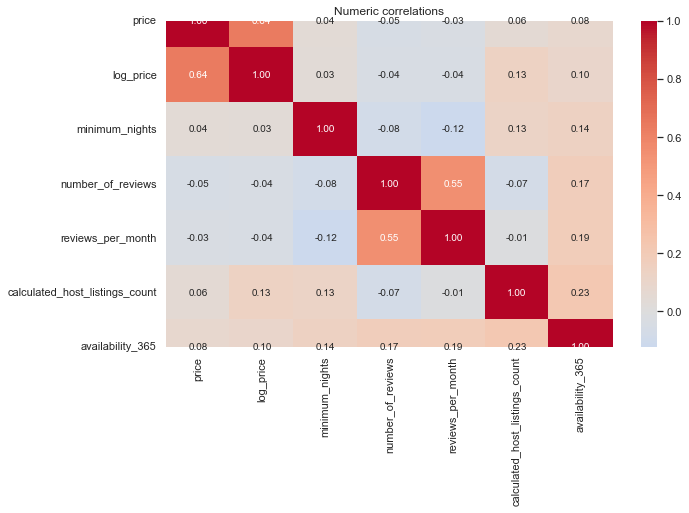

In [17]:
num_cols = ['price','log_price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Numeric correlations")
plt.show()

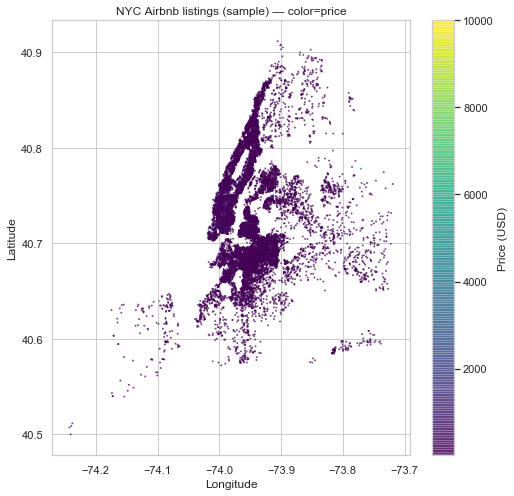

In [18]:
# color coded listing with location and price
sample = df.sample(20000, random_state=1)
plt.figure(figsize=(8,8))
plt.scatter(sample['longitude'], sample['latitude'], s=1, c=sample['price'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Price (USD)')
plt.title("NYC Airbnb listings (sample) — color=price")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

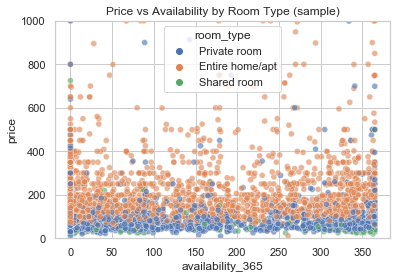

In [19]:
# Price vs availability colored by room_type (sample)
sample = df.sample(5000, random_state=42)
sns.scatterplot(x='availability_365', y='price', hue='room_type', data=sample, alpha=0.6)
plt.ylim(0,1000)
plt.title("Price vs Availability by Room Type (sample)")
plt.show()


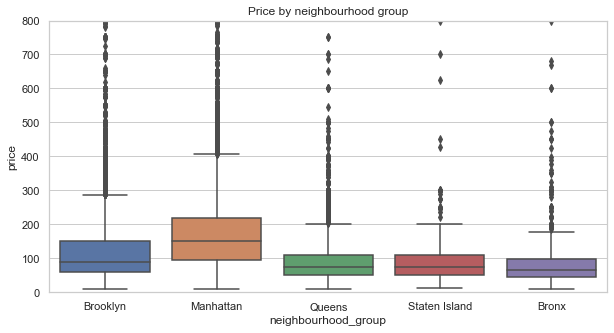

In [20]:
# Boxplot price by neighbourhood_group
plt.figure(figsize=(10,5))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.ylim(0, 800)
plt.title("Price by neighbourhood group")
plt.show()